In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from BanditRec.settings import NewsSimulationSetting, NewsSimulationSetting2
from BanditRec.setting import SettingConfig
from BanditRec.agents import RandomAgent, EpsGreedyAgent, ThompsonAgent, FroomleAgent
from BanditRec.simulator import Simulator

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

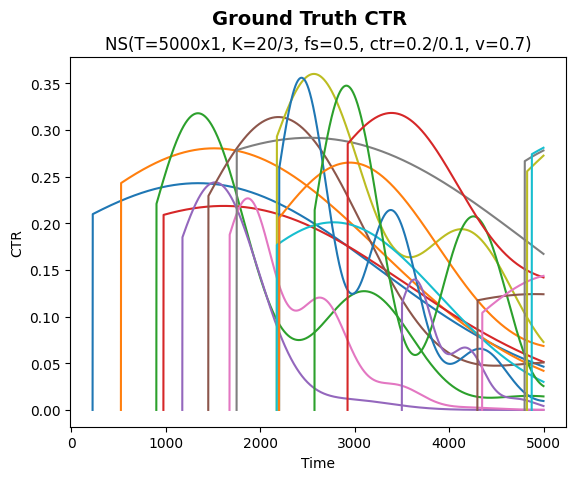

In [3]:
setting = NewsSimulationSetting(
        SettingConfig(5000, 20, 3, 1),
        falloff_speed=0.5, 
        ctr_base=0.2,
        ctr_fuzz=0.1
    )
setting.visualize()

In [4]:
sim = Simulator(setting=setting, run_count=200, seed_change_interval=5)

sim.run_oracle()
for i in range(10):
    sim.run_agent(ThompsonAgent, {}, label=i)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

 NS(T=5000x1, K=20/3, fs=0.5, ctr=0.2/0.1, v=0.7) 
     400.9 ±15.3       - 1
     405.3 ±16.1       - 4
     406.6 ±14.9       - 7
     407.4 ±15.7       - 9
     407.5 ±15.7       - 2
     408.0 ±16.9       - 3
     408.8 ±16.1       - 5
     413.5 ±15.9       - 8
     413.5 ±17.4       - 0
     419.3 ±16.1       - 6



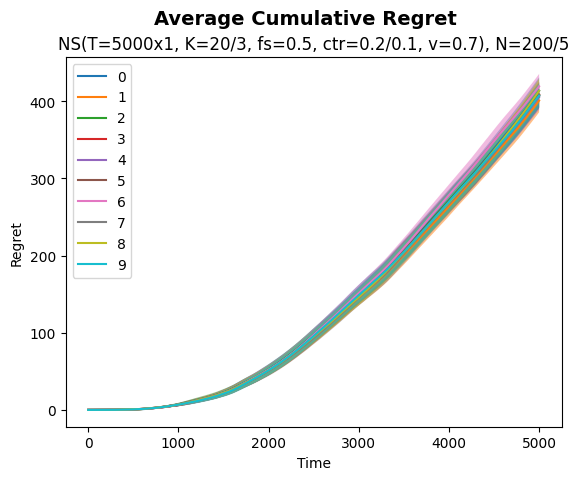

In [5]:
sim.results.rank()
sim.results.create_regret_plot()

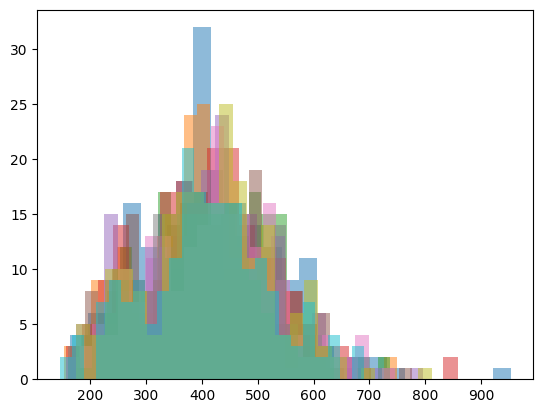

In [8]:
o = sim.results.results[setting.label]['Oracle'].reward_array

for i in range(10):
    a = (o - sim.results.results[setting.label][i].reward_array).cumsum(axis=1)[:, -1]
    plt.hist(a, bins=25, alpha=0.5)